In [1]:
from jax import jit, vmap, grad
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

import jaxquantum.circuits as jqtc
import jaxquantum as jqt


import sys
sys.path.append("..")

from state_prep_opt import sim_cf 

(1, 2)


(array([[<Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>,
         <Axes: xlabel='Re[$\\alpha$]', ylabel='Im[$\\alpha$]'>]],
       dtype=object),
 <matplotlib.contour.QuadContourSet at 0x1956e52ed80>)

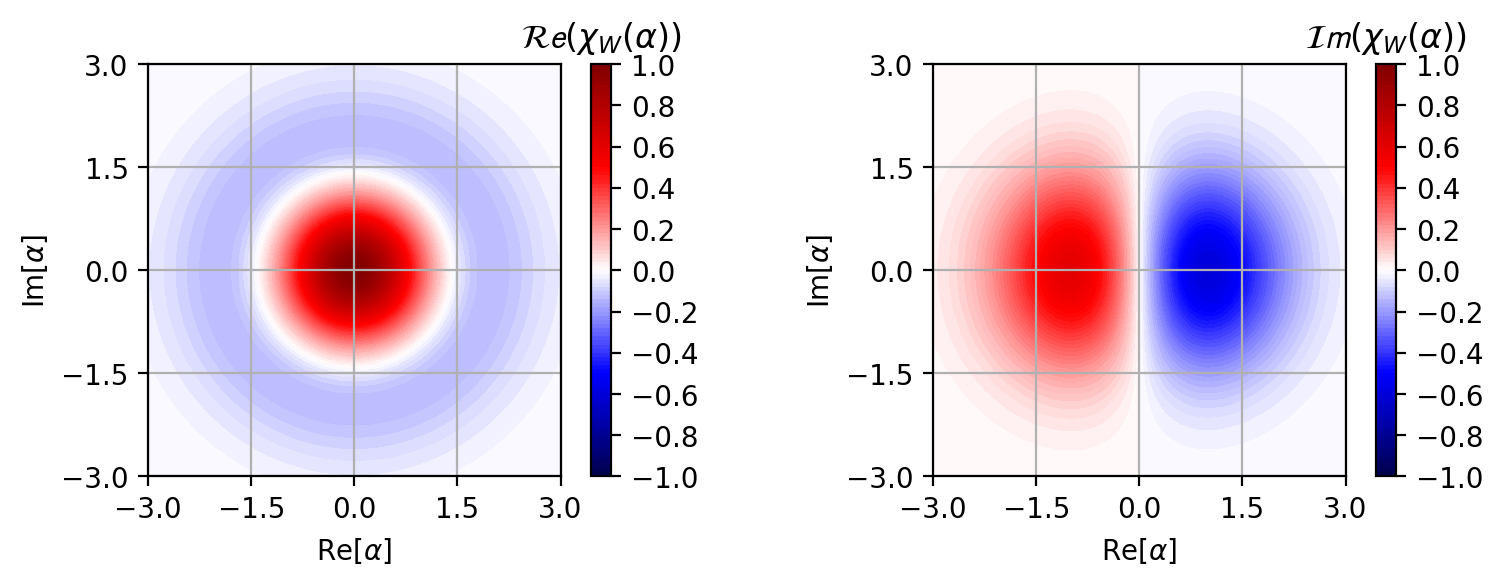

In [2]:
N = 20
osc_state = (jqt.basis(N, 0) + 1j * jqt.basis(N, 1)).unit()

betas_re = jnp.linspace(-3,3, 51)
betas_im = jnp.linspace(-3,3, 51)

jqt.plot_cf(osc_state, betas_re, betas_im)

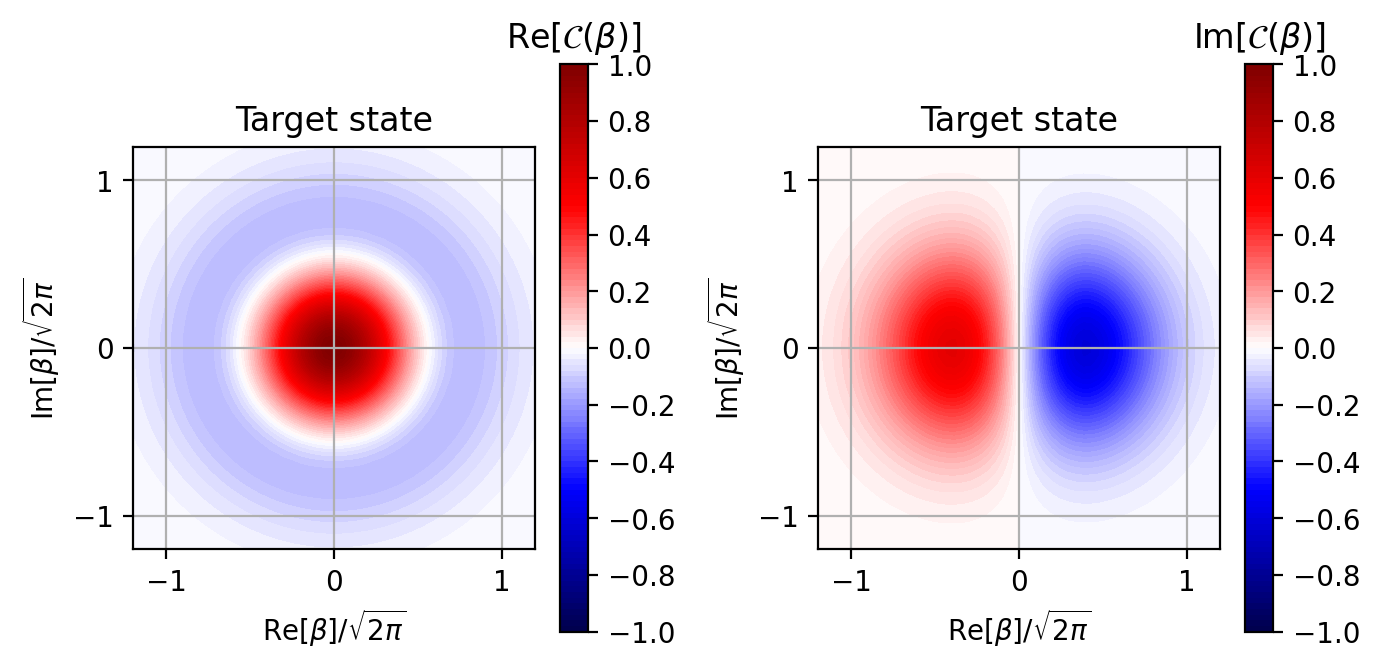

In [3]:
N = 20
osc_state = (jqt.basis(N, 0) + 1j * jqt.basis(N, 1)).unit()

betas_re = jnp.linspace(-3,3, 51)
betas_im = jnp.linspace(-3,3, 51)

cf_vals, _, _ = sim_cf(osc_state, betas_re, betas_im)

fig, axs = plt.subplots(1, 2, dpi=200, figsize=(7,3.5))

for j, ax in enumerate((axs[0], axs[1])):
    vmin=-1
    vmax=1
    sf = 1/(jnp.sqrt(2*jnp.pi))

    if j == 0:
        cf_vals_plot = jnp.real(cf_vals)
        cbar_title = r"Re[$\mathcal{C}(\beta)$]"
    else:
        cf_vals_plot = jnp.imag(cf_vals)
        cbar_title = r"Im[$\mathcal{C}(\beta)$]"

    im = ax.contourf(betas_re*sf, betas_im*sf, cf_vals_plot.T, levels=jnp.linspace(vmin, vmax, 101), cmap="seismic", vmin=vmin, vmax=vmax)
    ax.set_aspect("equal", adjustable="box")
    ax.grid()

    ax.set_xticks([-1,0, 1])
    ax.set_yticks([-1,0, 1])
    ax.set_xlabel(r"Re[$\beta$]/$\sqrt{2\pi}$")
    ax.set_ylabel(r"Im[$\beta$]/$\sqrt{2\pi}$")

    cbar = plt.colorbar(im, ax=ax, orientation="vertical")
    cbar.ax.set_title(cbar_title)
    cbar.ax.set_yticks(jnp.linspace(-1, 1, 11))

    ax.set_title(r"Target state")

plt.tight_layout()